# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from icecream import ic



# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [ ]:
# YOUR CODE HERE

temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# YOUR CODE HERE
print(temp.dtypes)


City            object
State           object
Temperature    float64
dtype: object


#### Select the rows where state is New York

In [7]:
# YOUR CODE HERE
new_york_df = temp[temp['State'] == 'New York']
print(new_york_df)


      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [12]:
# round the average to the same number of decimal places as the data in the column

def count_decimals(x):
    if isinstance(x, (int, np.int64)):
        return 0
    elif isinstance(x, float):
        decimal_part = str(x).split('.')[1]
        # Remove trailing zeros
        decimal_part = decimal_part.rstrip('0')
        return len(decimal_part)
    else:
        return 0
    


ave_temp_new_york = new_york_df['Temperature'].mean()

decimals = new_york_df['Temperature'].apply(count_decimals).max()

rounded_average = round(ave_temp_new_york, decimals)

print(rounded_average)

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
# your answer here

condition = temp['Temperature'] > 15
cities_states_temp_above_15C_df = temp[condition]

print(cities_states_temp_above_15C_df)


       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
# YOUR CODE HERE

cities_temp_above_15C_df = cities_states_temp_above_15C_df['City']
print(cities_temp_above_15C_df)



0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [25]:
# YOUR CODE HERE

cities_states_temp_btw_15C_20C_ = cities_states_temp_above_15C_df['Temperature'] < 20
cities_temp_btw_15C_20C_ = cities_states_temp_above_15C_df['City']
print(cities_temp_btw_15C_20C_)

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


In [26]:
temp['State'].value_counts()

New York       3
Connecticut    2
New Jersey     2
Name: State, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [29]:
# YOUR CODE HERE

# Group by 'State' and calculate mean and standard deviation
result = temp.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()

#  rename columns
result = result.rename(columns={'mean': 'Mean Temperature', 'std': 'Std dev Temperature'})

# Display the result
print(result)



         State  Mean Temperature  Std dev Temperature
0  Connecticut         15.833333             1.964186
1   New Jersey         21.111111             1.571348
2     New York         10.740741             8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [30]:

employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [33]:
# YOUR CODE HERE

print(employee)
print(employee.dtypes)

# it is a listing of employee information. 
# 
# 
# | Variable    | Type                      | Reason                                                        |
# |-------------|---------------------------|------------------------------------------------------         |
# | Name        | Categorical (Nominal)     | Person name                                                   |
# | Department  | Categorical (Nominal)     | Department name                                               |
# | Education   | Ordinal                   | Education levels (Bachelor < Master < PhD); there is an order.|
# | Gender      | Categorical (Nominal)     | Male/ Female category                                         |
# | Title       | Ordinal                   | There seems to be an order/ranking to the titles              |
# | Years       | Count (Discrete Numeric)  | Number of years, int                                          |
# | Salary      | Real Value (Continuous)   | Numeric value can take any from a range.                      |


     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70
Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

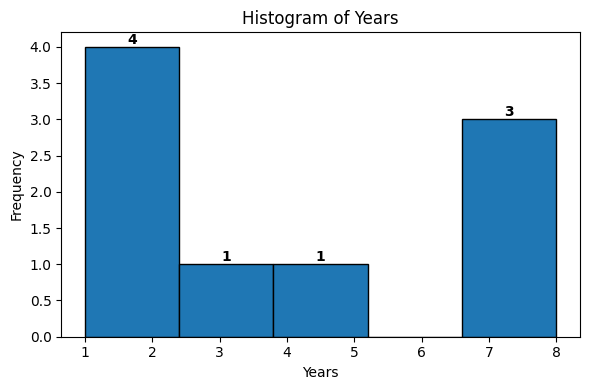

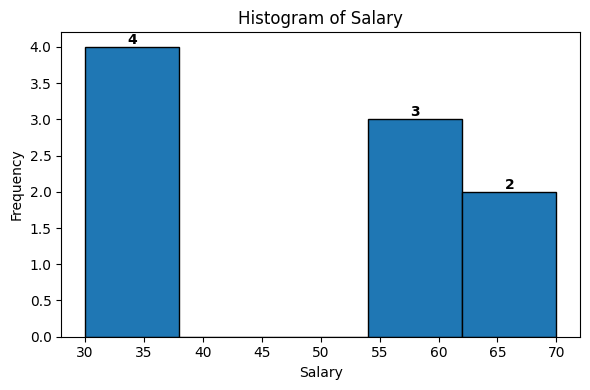

In [ ]:
# YOUR CODE HERE

# List of numeric columns
numeric_cols = ['Years', 'Salary']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    
    # Plot the histogram 
    n, bins, patches = plt.hist(employee[col], bins=5, edgecolor='black')
    
    # Label the top of each bar with its numeric value
    for i in range(len(patches)):
        # center of each bar (x-position)
        x = (bins[i] + bins[i+1]) / 2  
        # height of the bar (y-position)
        y = n[i]
        # add text only if there is a count (y > 0)
        if y > 0:
            plt.text(x, y, str(int(y)), 
                     ha='center', va='bottom', 
                     fontweight='bold', color='black')
    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

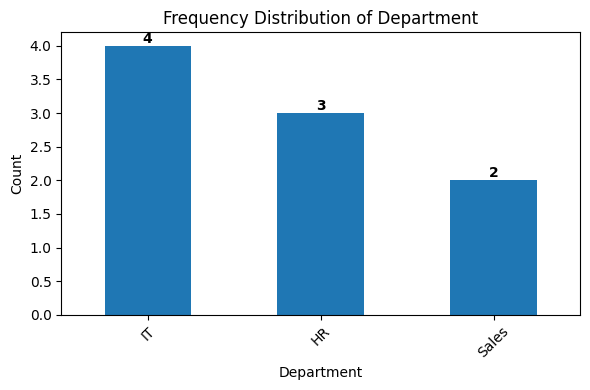

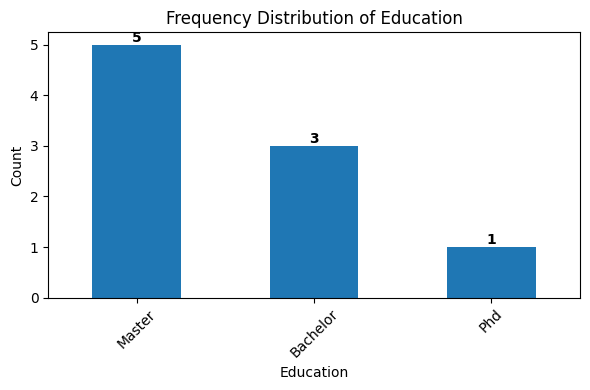

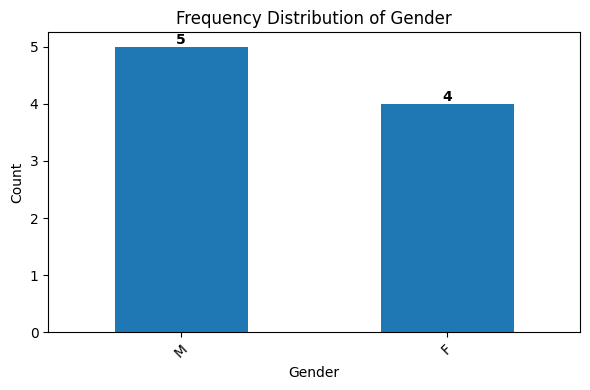

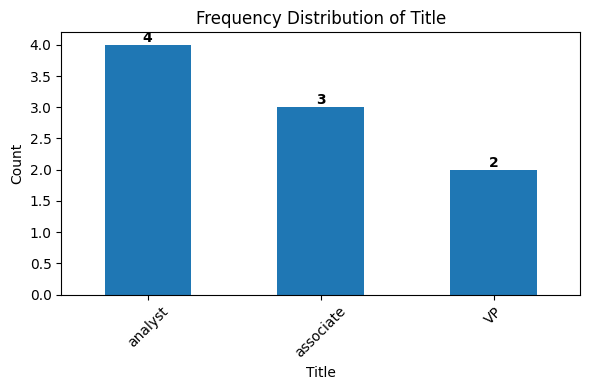

In [41]:
# your answer here

# Categorical columns
categorical_cols = ['Department', 'Education', 'Gender', 'Title']

# Create a bar chart for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    
    # .plot(kind='bar') returns an Axes object; we capture it in `ax`
    ax = employee[col].value_counts().plot(kind='bar')
    
    # Label the top of each bar with its numeric value
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2.0   # The center of each bar
        y = p.get_height()                   # The height of each bar
        if y > 0:
            ax.text(x, y, str(int(y)),
                    ha='center', va='bottom',
                    fontweight='bold', color='black')
    
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels (if needed)
    plt.tight_layout()       # Adjust layout
    plt.show()



#### What's the average salary in this company?

In [47]:

# print(employee)

ave_salary = employee['Salary'].mean()
print(f'Average salary: ${ave_salary:.2f}') # print to 2 decimal places


Average salary: $48.89


#### What's the highest salary?

In [48]:


max_salary = employee['Salary'].max()
print(f'Highest salary: ${max_salary:.2f}') # print to 2 decimal places


Highest salary: $70.00


#### What's the lowest salary?

In [49]:


min_salary = employee['Salary'].min()
print(f'Lowest salary: ${min_salary:.2f}') # print to 2 decimal places

Lowest salary: $30.00


#### Who are the employees with the lowest salary?

In [51]:
# finds the index of the row with the minimum salary
lowest_salary_row = employee.loc[employee['Salary'].idxmin()]

# Extract the person's name and salary
lowest_name = lowest_salary_row['Name']
lowest_salary = lowest_salary_row['Salary']

# Print the result
print(f'The person with the lowest salary is {lowest_name}, with ${lowest_salary:.2f}.')


The person with the lowest salary is Maria, with $30.00.


#### Could you give all the information about an employee called David?

In [55]:
# ic(employee)

# Get the row where the 'Name' column has the value 'David'
david_row = employee.loc[employee['Name'] == 'David']
print(david_row)



    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [56]:

david_salary = david_row['Salary']
print(david_salary)

2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [58]:
associate_row = employee.loc[employee['Title'] == 'associate']
print(associate_row)


     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [59]:
# YOUR CODE HERE
print(employee.head(3))


    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [60]:
# using a for loop
for index, row in employee.head(3).iterrows():
    print(f"Row {index}:")
    print(row)


Row 0:
Name              Jose
Department          IT
Education     Bachelor
Gender               M
Title          analyst
Years                1
Salary              35
Name: 0, dtype: object
Row 1:
Name            Maria
Department         IT
Education      Master
Gender              F
Title         analyst
Years               2
Salary             30
Name: 1, dtype: object
Row 2:
Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object


#### Find the employees who's title is associate and the salary above 55?

In [67]:
associate_row = employee.loc[employee['Title'] == 'associate']
# ic(associate_row)

associate_sal_greater_55 = associate_row.loc[associate_row['Salary'] > 55]
print(associate_sal_greater_55)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [ ]:
# Group by 'Years' and calculate mean of salaries
employee_group_years = employee.groupby('Years')['Salary'].agg(['mean']).reset_index()

#  rename columns
employee_group_years = employee_group_years.rename(columns={'Years': 'Years of Employment', 'mean': 'Average Salary'})

print(employee_group_years)


   Years of Employment  Average Salary
0                    1       35.000000
1                    2       38.333333
2                    3       55.000000
3                    4       35.000000
4                    7       60.000000
5                    8       70.000000


####  What is the average Salary per title?

In [72]:
# Group by 'Title' and calculate mean of salaries
ave_salary_title = employee.groupby('Title')['Salary'].agg(['mean']).reset_index()
# ic(ave_salary_title)
print(ave_salary_title)

       Title       mean
0         VP  70.000000
1    analyst  32.500000
2  associate  56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

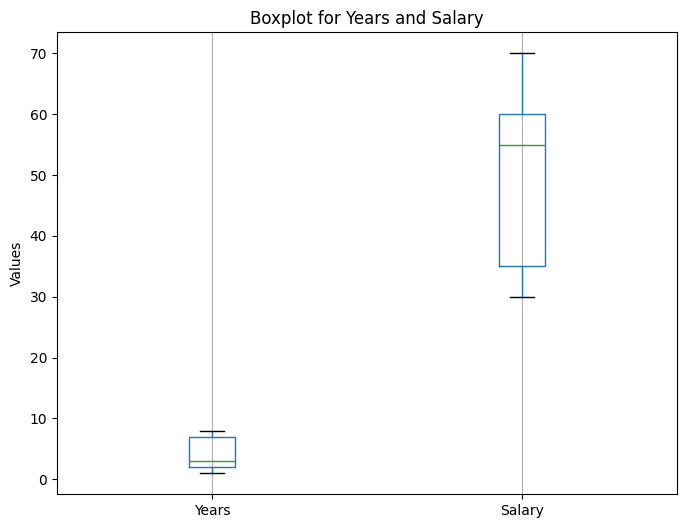

      Years  Salary
0.25    2.0    35.0
0.75    7.0    60.0


In [74]:
# Boxplot for numerical data

employee[numeric_cols].boxplot(figsize=(8, 6))
plt.title('Boxplot for Years and Salary')
plt.ylabel('Values')
plt.grid(axis='y')
plt.show()

# Calculating first and third quartiles
quartiles = employee[numeric_cols].quantile([0.25, 0.75])
print(quartiles)

In [75]:
# print first quartile here

# Calculating first quartile
first_quartile = employee[numeric_cols].quantile([0.25])
print(first_quartile)

      Years  Salary
0.25    2.0    35.0


In [76]:
# print third quartile here

# Calculating third quartile
third_quartile = employee[numeric_cols].quantile([0.75])
print(third_quartile)

      Years  Salary
0.75    7.0    60.0


#### Is the mean salary per gender different?

In [77]:
# Group by 'Gender' and calculate mean of salaries
ave_salary_gender = employee.groupby('Gender')['Salary'].agg(['mean']).reset_index()
# ic(ave_salary_gender)
print(ave_salary_gender)

  Gender  mean
0      F  47.5
1      M  50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [90]:
# List of numeric columns
numeric_cols = ['Years', 'Salary']

# ic(numeric_cols[0])

# stats_per_dept = employee.groupby('Department')[numeric_cols[0]].min()

# stats_per_dept = employee[employee[numeric_cols[0]].idxmin()]
# min_years = employee['Years'].min()

stats_per_dept = employee.groupby('Department')[numeric_cols].agg(['min', 'mean', 'max'])

ic(stats_per_dept)


ic| stats_per_dept

:            Years               Salary           
                                 min      mean max    min   mean max
                    Department                                      
                    HR             2  4.666667   8     30  45.00  70
                    IT             1  4.500000   8     30  48.75  70
                    Sales          2  2.500000   3     55  55.00  55


Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [92]:

# custom lambda function, lambda x: x.max() - x.min()
# x is salary values in a single department group.

range_per_dept = employee.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min()).to_dict()

# ic(range_per_dept)

print(range_per_dept)

{'HR': 40, 'IT': 40, 'Sales': 0}


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [93]:

orders =pd.read_csv('orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
print(orders.dtypes)
print(orders.describe())

In [ ]:
# | Variable      | Type                      | Reason                                                                                                    |
# |---------------|---------------------------|-----------------------------------------------------------------------------------------------------------|
# | InvoiceNo     | Categorical (Nominal)     | distinct invoice no., does not have any inherent numerical meaning or order beyond identifying invoices   |
# | StockCode     | Categorical (Nominal)     | unique stock codes for items                                                                              |
# | year          | Ordinal                   | sequence of years in chronological order.                                                                 |
# | month         | Ordinal                   | months in a calendar year.                                                                                |
# | day           | Ordinal                   | days of the month                                                                                         |
# | hour          | Ordinal                   | hours of the day                                                                                          |
# | Description   | Categorical (Nominal)     | description of item                                                                                       |
# | Quantity      | Count (Discrete Numeric)  | integer counts of items purchased                                                                         |
# | InvoiceDate   | Categorical (Nominal)     | specific invoice timestamps; treated as a category                                                        |
# | UnitPrice     | Real Value (Continuous)   | price per unit                                                                                            |
# | CustomerID    | Categorical (Nominal)     | unique customer ID                                                                                        |
# | Country       | Categorical (Nominal)     | country names                                                                                             |
# | amount_spent  | Real Value (Continuous)   | total spend                                                                                               |


In [105]:
# Determining unique categorical values
categorical_cols = ["InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "Country"]
unique_categorical_values = {col: orders[col].nunique() for col in categorical_cols}

unique_categorical_values

{'InvoiceNo': 18536,
 'StockCode': 3665,
 'Description': 3877,
 'InvoiceDate': 17286,
 'CustomerID': 4339,
 'Country': 37}

####  What is the average Purchase Price?

In [ ]:
# I am confused by the question. Does it refer to the average 'UnitPrice' per 'StockCode' 
# or average 'amount_spent' per 'InvoiceNo' ??
# Whatever, I will just answer both options.  


# Option 1: average 'UnitPrice' per 'StockCode'
ave_UnitPrice_per_StockCode = orders.groupby('StockCode')['UnitPrice'].agg(['mean']).reset_index()

# renaming for clarity
ave_UnitPrice_per_StockCode.rename(columns={'mean': 'AverageUnitPrice'}, inplace=True)

ave_price_per_item = round(ave_UnitPrice_per_StockCode['AverageUnitPrice'].mean(), 2)

# ic(ave_UnitPrice_per_StockCode)

# Option 2: average 'amount_spent' per 'InvoiceNo'
# Group 'orders' by 'InvoiceNo' and calculate sum of 'amount_spent'
spend_per_invoice = orders.groupby('InvoiceNo')['amount_spent'].agg(['sum']).reset_index()
ave_spend_per_invoice = round(spend_per_invoice['sum'].mean(), 2)


#ic(spend_per_invoice)
# ic(ave_spend_per_invoice)

print(f"Option 1: Average Price per Item (UnitPrice per StockCode): ${ave_price_per_item}")
print(f"Option 2: Average Spend per Invoice (amount_spent per InvoiceNo): ${ave_spend_per_invoice}")


Option 1: Average Price per Item (UnitPrice per StockCode): $3.63
Option 2: Average Spend per Invoice (amount_spent per InvoiceNo): $480.76


#### What were the highest and lowest purchase prices? 

In [120]:
# ic(ave_UnitPrice_per_StockCode)

max_UnitPrice_per_StockCode = round(ave_UnitPrice_per_StockCode['AverageUnitPrice'].max(), 2)
# ic(max_UnitPrice_per_StockCode)

# ic(spend_per_invoice)
max_spend_per_invoice = round(spend_per_invoice['sum'].max(), 2)
# ic(max_spend_per_invoice)

print(f"Option 1: Highest purchase price (UnitPrice per StockCode): ${max_UnitPrice_per_StockCode}")
print(f"Option 2: Highest purchase price (amount_spent per InvoiceNo): ${max_spend_per_invoice}")


Option 1: Highest purchase price (UnitPrice per StockCode): $744.15
Option 2: Highest purchase price (amount_spent per InvoiceNo): $168469.6


In [121]:
min_UnitPrice_per_StockCode = round(ave_UnitPrice_per_StockCode['AverageUnitPrice'].min(), 2)

min_spend_per_invoice = round(spend_per_invoice['sum'].min(), 2)

print(f"Option 1: Lowest purchase price (UnitPrice per StockCode): ${min_UnitPrice_per_StockCode}")
print(f"Option 2: Lowest purchase price (amount_spent per InvoiceNo): ${min_spend_per_invoice}")

Option 1: Lowest purchase price (UnitPrice per StockCode): $0.0
Option 2: Lowest purchase price (amount_spent per InvoiceNo): $0.0


#### Select all the customers we have in Spain

In [ ]:
customers_in_spain = orders[orders['Country'] == 'Spain']['CustomerID'].unique()

# ic(customers_in_spain)

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [126]:
unique_customers_in_spain_count = orders[orders['Country'] == 'Spain']['CustomerID'].nunique()
print(f"Number of unique customers in Spain: {unique_customers_in_spain_count}")

# using value_counts()

customers_in_spain_count = orders['Country'].value_counts().get('Spain', 0)
print(f"Total number of rows for customers in Spain: {customers_in_spain_count}")


Number of unique customers in Spain: 30
Total number of rows for customers in Spain: 2485


#### Select all the customers who have bought more than 50 items ?

In [160]:
# Aggregating orders grouped by 'CustomerID'
orders_grouped_by_customer = orders.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',       # Number of unique invoices
    'StockCode': 'nunique',       # Number of unique stock codes
    'year': 'first',              # First year of purchase (assuming one year per customer)
    'month': 'first',             # First month of purchase
    'day': 'first',               # First day of purchase
    'hour': 'mean',               # Average hour of purchase
    'Description': 'count',       # Number of items purchased (by description)
    'Quantity': 'sum',            # Total quantity of items purchased
    'InvoiceDate': 'first',       # First invoice date
    'UnitPrice': 'mean',          # Average unit price
    'amount_spent': 'sum',        # Total amount spent
    'Country': 'first',           # Assuming each customer is from one country
}).reset_index()


# Renaming columns for clarity
orders_grouped_by_customer.rename(columns={
    'InvoiceNo': 'Num_Invoices',
    'StockCode': 'Unique_StockCodes',
    'Description': 'Num_Items',
    'Quantity': 'Total_Quantity',
    'UnitPrice': 'Average_UnitPrice',
    'amount_spent': 'Total_Amount_Spent',
    'InvoiceDate': 'First_InvoiceDate',
}, inplace=True)

# Filtering customers who bought more than 50 items
customers_bought_more_than_50_items = orders_grouped_by_customer.loc[orders_grouped_by_customer['Total_Quantity'] > 50]

# ic(customers_bought_more_than_50_items)



#### Select orders from Spain that are above 50 items

In [ ]:

customers_bought_more_than_50_items_spain = customers_bought_more_than_50_items[customers_bought_more_than_50_items['Country'] == 'Spain']
# ic(customers_bought_more_than_50_items_spain)

#### Select all free orders

In [ ]:
#### Select all free orders

# Aggregating orders grouped by 'InvoiceNo'
orders_by_invoice = orders.groupby('InvoiceNo').agg({
    'Quantity': 'sum',            # Total quantity of items purchased
    'amount_spent': 'sum',        # Total amount spent
    'Country': 'first',           # Assume each invoice is tied to one country
}).reset_index()

# Select only free orders (amount_spent == 0)
free_orders = orders_by_invoice[orders_by_invoice['amount_spent'] == 0]

# ic(free_orders)

# Renaming columns for clarity
orders_grouped_by_customer.rename(columns={
    'InvoiceNo': 'Num_Invoices',
    'Quantity': 'Total_Quantity',
    'amount_spent': 'Total_Amount_Spent'
}, inplace=True)

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
#### Select all orders that have 'lunch bag' in the description

lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]

# ic(lunch_bag_orders)

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
#### Select all orders that are made in 2011 and are 'lunch bag'  

lunch_bag_orders_2011 = lunch_bag_orders[lunch_bag_orders['year'] == 2011]
# ic(lunch_bag_orders_2011)

#### Show the frequency distribution of the amount spent in Spain.

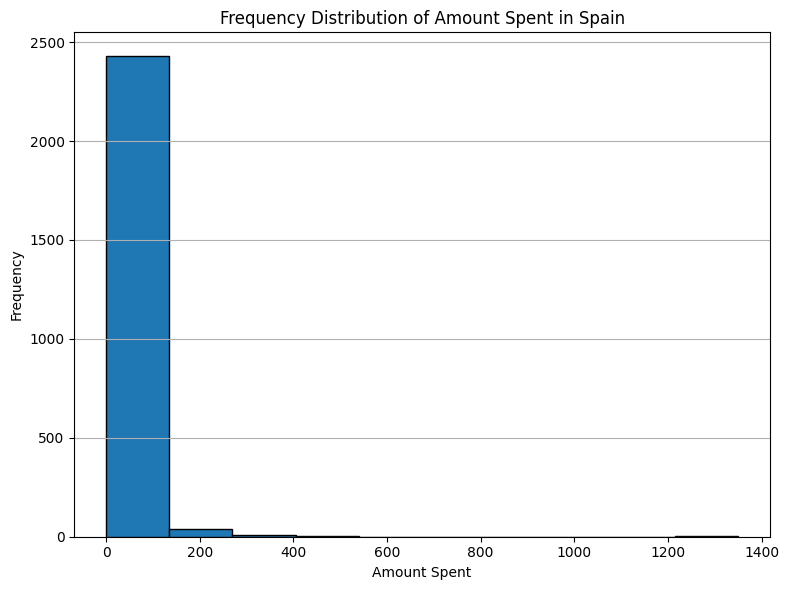

In [154]:
# Filter only orders from Spain
orders_in_spain = orders[orders['Country'] == 'Spain']

# Plot the frequency distribution of 'amount_spent'
plt.figure(figsize=(8, 6))
plt.hist(orders_in_spain['amount_spent'], bins=10, edgecolor='black')
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Select all orders made in the month of August

In [ ]:
orders_august = orders[orders['month'] == 8]

# ic(orders_august)


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

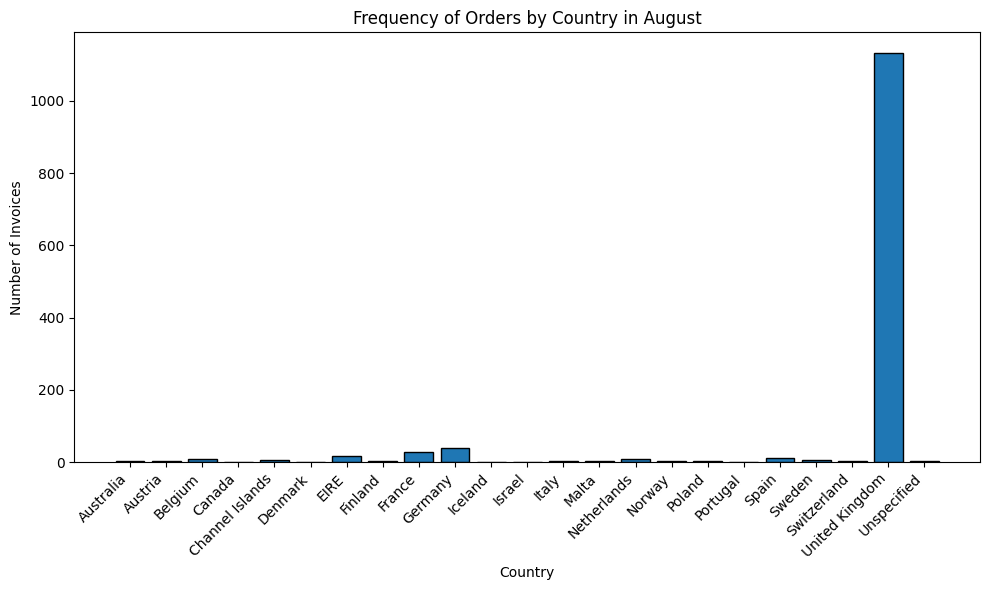

In [159]:
# Aggregate by 'Country'
august_orders_by_country = orders_august.groupby('Country').agg({
    'InvoiceNo': 'nunique',       # Number of unique invoices
    'Quantity': 'sum',            # Total quantity of items purchased
    'amount_spent': 'sum',        # Total amount spent
}).reset_index()

# Rename columns for clarity
august_orders_by_country.rename(columns={'InvoiceNo': 'Num_Invoices'}, inplace=True)

# Create a bar graph 
plt.figure(figsize=(10, 6))
plt.bar(august_orders_by_country['Country'], august_orders_by_country['Num_Invoices'], edgecolor='black')
plt.title('Frequency of Orders by Country in August')
plt.xlabel('Country')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### What's the  average amount of money spent by country

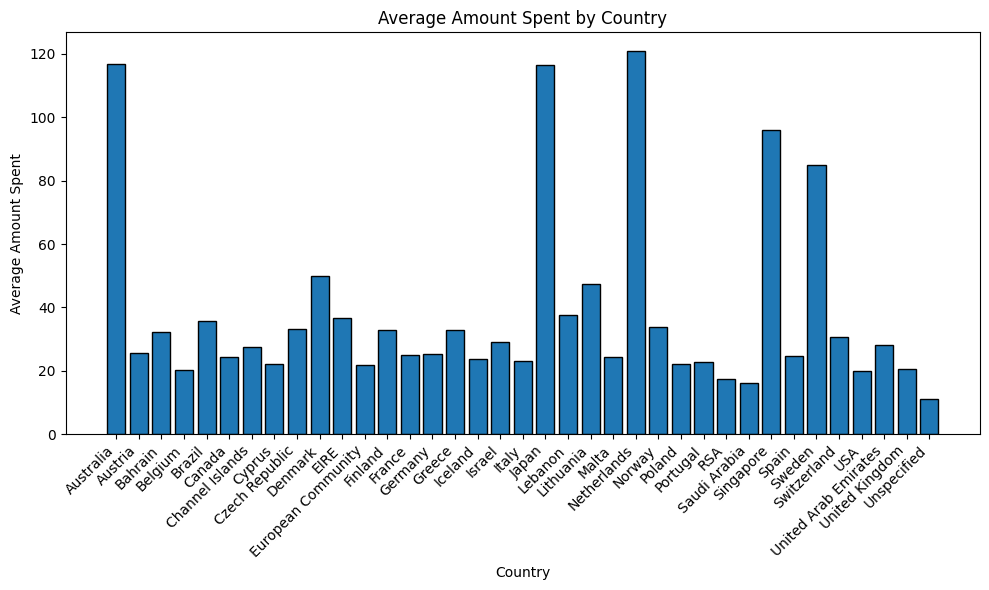

In [162]:
# Aggregate by 'Country'
orders_ave_by_country = orders.groupby('Country').agg({
    'InvoiceNo': 'nunique',       # Number of unique invoices
    'Quantity': 'sum',            # Total quantity of items purchased
    'amount_spent': 'mean',        # Total amount spent
}).reset_index()

# Rename columns for clarity
orders_ave_by_country.rename(columns={'amount_spent': 'Average_Amount_Spent'}, inplace=True)


# Create a histogram of the average amount spent by country
plt.figure(figsize=(10, 6))
plt.bar(orders_ave_by_country['Country'], orders_ave_by_country['Average_Amount_Spent'], edgecolor='black')
plt.title('Average Amount Spent by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### What's the most expensive item?

In [166]:
# Find the most expensive item based on UnitPrice
most_expensive_item = orders.loc[orders['UnitPrice'].idxmax()]

print(f"The most expensive item is {most_expensive_item['Description']}, at a price of ${most_expensive_item['UnitPrice']}")


The most expensive item is postage, at a price of $8142.75


#### What was the average amount spent per year ?

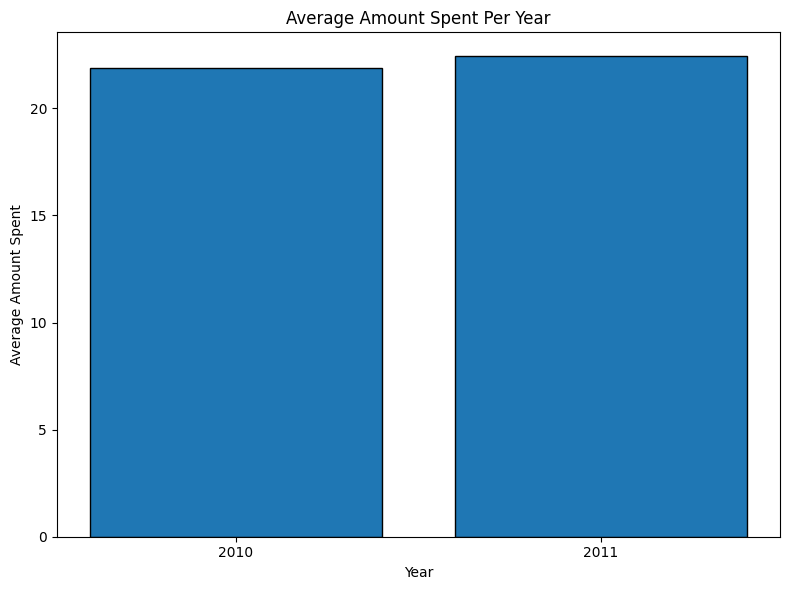

In [170]:
# Calculate the average amount spent per year
average_spent_per_year = orders.groupby('year')['amount_spent'].mean().reset_index()

# Rename columns for clarity
average_spent_per_year.rename(columns={'amount_spent': 'Average_Amount_Spent'}, inplace=True)

# Create a histogram for the average amount spent per year
plt.figure(figsize=(8, 6))
plt.bar(average_spent_per_year['year'], average_spent_per_year['Average_Amount_Spent'], edgecolor='black')
plt.title('Average Amount Spent Per Year')
plt.xlabel('Year')
plt.ylabel('Average Amount Spent')
plt.xticks(average_spent_per_year['year'])
plt.tight_layout()
plt.show()